TODO1

In [65]:
import pandas as pd
df = pd.read_csv( 'train.csv' )

TODO2

C:\Users\liuzu\AppData\Local\Temp\ipykernel_28036\1068925436.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="CentralAir", kind="count", data=df, palette="Set1")
c:\Users\liuzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


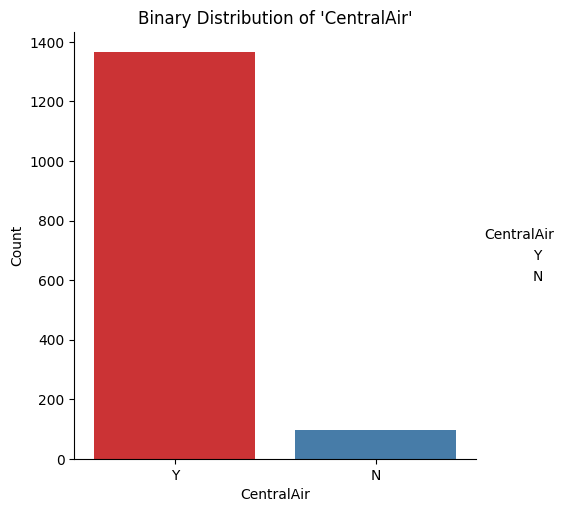

C:\Users\liuzu\AppData\Local\Temp\ipykernel_28036\1068925436.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CentralAir', y='SalePrice', data=df, palette="Set1")


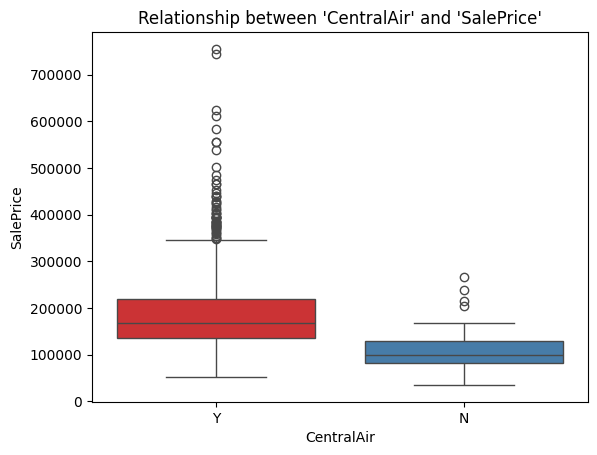

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a catplot 
sns.catplot(x="CentralAir", kind="count", data=df, palette="Set1")

plt.xlabel("CentralAir")
plt.ylabel("Count")
plt.title("Binary Distribution of 'CentralAir'")

plt.show()

# Create a boxplot 
sns.boxplot(x='CentralAir', y='SalePrice', data=df, palette="Set1")

plt.xlabel('CentralAir')
plt.ylabel('SalePrice')
plt.title("Relationship between 'CentralAir' and 'SalePrice'")

plt.show()


TODO3

In [67]:
from sklearn.model_selection import train_test_split
Y = df[['CentralAir']]
X = df['SalePrice']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=1100, test_size=360, random_state=6804)

houseData_train = X_train.copy()
houseData_train['SalePrice'] = Y_train

houseData_test = X_test.copy()
houseData_test['SalePrice'] = Y_test

TODO4

In [68]:
from sklearn.tree import DecisionTreeClassifier
X = df[['SalePrice']]
y = df['CentralAir']
y = y.map({'N': 0, 'Y': 1})
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

TODO5

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Reshape 'SalePrice' from a 1D array to a 2D array
X_test_reshaped = X_test.values.reshape(-1, 1)

# Map 'N' to 0 and 'Y' to 1 in Y_test
Y_test['CentralAir'] = Y_test['CentralAir'].map({'N': 0, 'Y': 1})

# Predict 'CentralAir' for the test dataset
y_pred = clf.predict(X_test_reshaped)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test['CentralAir'], y_pred)

# Calculate accuracy and other metrics
accuracy = accuracy_score(Y_test['CentralAir'], y_pred)
true_positive = conf_matrix[1, 1]
true_negative = conf_matrix[0, 0]
false_positive = conf_matrix[0, 1]
false_negative = conf_matrix[1, 0]

# Print the confusion matrix and accuracy metrics
print("Confusion Matrix:")
print(conf_matrix)
print(f"Classification Accuracy: {accuracy:.2f}")
print(f"True Positive Rate: {true_positive / (true_positive + false_negative):.2f}")
print(f"True Negative Rate: {true_negative / (true_negative + false_positive):.2f}")
print(f"False Positive Rate: {false_positive / (true_negative + false_positive):.2f}")
print(f"False Negative Rate: {false_negative / (true_positive + false_negative):.2f}")


Confusion Matrix:
[[  9   9]
 [  4 338]]
Classification Accuracy: 0.96
True Positive Rate: 0.99
True Negative Rate: 0.50
False Positive Rate: 0.50
False Negative Rate: 0.01


c:\Users\liuzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


TODO6

In [70]:
# Create and train Decision Trees for each attribute
attributes = ['GrLivArea', 'LotArea', 'TotalBsmtSF']
results = []

for attribute in attributes:
    # Prepare the data
    X = df[[attribute]]
    y = df['CentralAir'].map({'N': 0, 'Y': 1})

    # Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=1100, test_size=360, random_state=6804)

    # Create a Decision Tree classifier
    clf = DecisionTreeClassifier()

    # Fit the model to the training data
    clf.fit(X_train, Y_train)

    # Predict 'CentralAir' for the test dataset
    y_pred = clf.predict(X_test)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(Y_test, y_pred)

    # Calculate accuracy and other metrics
    accuracy = accuracy_score(Y_test, y_pred)
    true_positive = conf_matrix[1, 1]
    true_negative = conf_matrix[0, 0]
    false_positive = conf_matrix[0, 1]
    false_negative = conf_matrix[1, 0]

    results.append({
        'Attribute': attribute,
        'ConfusionMatrix': conf_matrix,
        'Accuracy': accuracy,
        'TruePositiveRate': true_positive / (true_positive + false_negative),
        'TrueNegativeRate': true_negative / (true_negative + false_positive),
        'FalsePositiveRate': false_positive / (true_negative + false_positive),
        'FalseNegativeRate': false_negative / (true_positive + false_negative),
    })

# Print the results for each attribute
for result in results:
    print(f"Attribute: {result['Attribute']}")
    print("Confusion Matrix:")
    print(result['ConfusionMatrix'])
    print(f"Classification Accuracy: {result['Accuracy']:.2f}")
    print(f"True Positive Rate: {result['TruePositiveRate']:.2f}")
    print(f"True Negative Rate: {result['TrueNegativeRate']:.2f}")
    print(f"False Positive Rate: {result['FalsePositiveRate']:.2f}")
    print(f"False Negative Rate: {result['FalseNegativeRate']:.2f}")
    print()


Attribute: GrLivArea
Confusion Matrix:
[[  3  15]
 [ 20 322]]
Classification Accuracy: 0.90
True Positive Rate: 0.94
True Negative Rate: 0.17
False Positive Rate: 0.83
False Negative Rate: 0.06

Attribute: LotArea
Confusion Matrix:
[[  1  17]
 [ 15 327]]
Classification Accuracy: 0.91
True Positive Rate: 0.96
True Negative Rate: 0.06
False Positive Rate: 0.94
False Negative Rate: 0.04

Attribute: TotalBsmtSF
Confusion Matrix:
[[  0  18]
 [ 14 328]]
Classification Accuracy: 0.91
True Positive Rate: 0.96
True Negative Rate: 0.00
False Positive Rate: 1.00
False Negative Rate: 0.04



TODO7

In [72]:
# Prepare the data
X = df[['SalePrice', 'GrLivArea', 'LotArea', 'TotalBsmtSF']]
y = df['CentralAir'].map({'N': 0, 'Y': 1})

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=1100, test_size=360, random_state=6804)

# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Fit the model to the training data
clf.fit(X_train, Y_train)

# Predict 'CentralAir' for the test dataset
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

# Calculate accuracy and other metrics
accuracy = accuracy_score(Y_test, y_pred)
true_positive = conf_matrix[1, 1]
true_negative = conf_matrix[0, 0]
false_positive = conf_matrix[0, 1]
false_negative = conf_matrix[1, 0]

# Print the confusion matrix and accuracy metrics
print("Confusion Matrix:")
print(conf_matrix)
print(f"Classification Accuracy: {accuracy:.2f}")
print(f"True Positive Rate: {true_positive / (true_positive + false_negative):.2f}")
print(f"True Negative Rate: {true_negative / (true_negative + false_positive):.2f}")
print(f"False Positive Rate: {false_positive / (true_negative + false_positive):.2f}")
print(f"False Negative Rate: {false_negative / (true_positive + false_negative):.2f}")


Confusion Matrix:
[[  9   9]
 [ 24 318]]
Classification Accuracy: 0.91
True Positive Rate: 0.93
True Negative Rate: 0.50
False Positive Rate: 0.50
False Negative Rate: 0.07


TODO8

Overall,
1. All models have a similar accuracy of around 0.91.
2. All models have similar TP rates, indicating that they correctly predict the 'Y' values (True Positives) at a high rate.
3. The number of False Positives varies slightly between models, with 'LotArea' having the highest FP count,followed by 'TotalBsmtSF' and 'GrLivArea.' The model with all four variables also has a similar number of FP.

Compare all models, in summary, the models based on 'GrLivArea,' 'LotArea,' and 'TotalBsmtSF' as individual features perform similarly in terms of Classification Accuracy and True Positives. The model using all four variables also shows a similar performance, suggesting that using all the variables together does not significantly outperform the individual models in this context.

Look into indiviual models,
- The 'GrLivArea' model has the lowest accuracy of 0.90 and a high False Positive Rate of 0.83, indicating that it misclassifies a significant number of 'N' as 'Y'.
- The 'LotArea' model performs slightly better with an accuracy of 0.91 but still has a high False Positive Rate, indicating a similar issue.
- The 'TotalBsmtSF' model has the same accuracy and still suffers from a high False Positive Rate.
- The model using all four variables has a similar accuracy but slightly better balance between True Positive Rate and False Positive Rate, although the False Positive Rate is still relatively high.

In summary, all the models have similar accuracy but struggle with a high False Positive Rate, indicating a tendency to predict 'Y' when the true label is 'N.

TODO9

In the case of using all four attributes together, the False Positive Rate (FPR) of the Decision Tree model appears to be significantly lower compared to the False Negative Rate (FNR) when compared to the other individual attribute-based models. This suggests that when using all four attributes together, the model is better at correctly identifying the negative class ('N' in 'CentralAir') while minimizing the rate of false positive predictions (predicting 'Y' when it's actually 'N').

The model using the 'TotalBsmtSF' attribute appears to have a significantly higher False Positive Rate (FPR) compared to the False Negative Rate (FNR).In this case, the model using 'TotalBsmtSF' is highly prone to making false positive predictions (predicting 'Y' when it's actually 'N') and has a relatively low false negative rate (missing actual 'Y' cases).

But in all cases, the FPRs are generally higher than the FNRs. This means that the models are more prone to making false positive predictions compared to false negatives.There's often a trade-off between FPR and FNR. The higher FPRs and lower FNRs are partly due to the class imbalance in the 'CentralAir' variable. In this dataset, one class ('Y') is more prevalent than the other ('N'). Decision Tree models tend to be biased toward the majority class, leading to a tendency to predict it more frequently. This bias contributes to higher FPR. 
We can tune the model to reduce one at the expense of the other. Also, to address class imbalance, we can use techniques like adjusting class weights, oversampling, undersampling, or ensemble methods like Random Forest or Gradient Boosting can often provide better overall performance in imbalanced datasets, as they combine multiple Decision Trees.
In summary, the different FPR and FNR values are indicative of the trade-offs and biases present in the Decision Tree models, and the class imbalance in the dataset plays a significant role in these results. The choice of which model to use depends on specific objectives and the importance of false positives and false negatives in the application.